## Ejemplo 1: Bootstrap

### 1. Objetivos:
    - Aprender el concepto de muestreo randomizado y su utilidad
    - Aprender el algoritmo de bootstrap paso a paso
    - Aprender a graficar distribuciones muestrales
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Muestreo aleatorio o randomizado

Una de las maneras en las que normalmente se evitan los sesgos a la hora de tomar muestras es a través del muestreo aleatorio o randomizado. Esto significa crear una muestra a partir de una población o de otra muestra eligiendo elementos del conjunto original aleatoriamente. Cada elemento tiene las mismas posiblidades de ser elegido para la nueva muestra, a menos que haya una buena razón para hacerlo distinto.

Con este procedimiento intentamos evitar el sesgo de selección.

In [2]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Por ejemplo, vamos a tomar algunas muestras de la variable 'glucose'. Un muestreo aleatorio puede tomarse sin reposición, lo cual significa que cada vez que un elemento se toma de la muestra original, no se regresa a la muestra original. Con cada muestreo entonces nuestra muestra original se hace más pequeña, lo cual en realidad cambia las probabilidades de elegir las muestras restantes:

In [3]:
df['glucose'].sample(n=20, replace=False)

409    172
446    100
548    164
358     88
685    129
317    182
602    124
253     86
555    124
247    165
303    115
368     81
37     102
456    135
257    114
216    109
155    152
373    105
601     96
341     95
Name: glucose, dtype: int64

Tambíen podemos tomar elementos con reposición, donde regresamos cada elemento después de tomar la muestra. Esto quiere decir que en cada toma tenemos la misma probabilidad de elegir cualquiera de los elementos y además el remuestreo puede incluir elementos repetidos:

In [4]:
df['glucose'].sample(frac=0.1, replace=True)

39     111
464    115
585     93
602    124
76      62
      ... 
612    168
336    117
640    102
628    128
752    108
Name: glucose, Length: 77, dtype: int64

### b) Bootstrap

El Bootstrap nos sirve para generar lo que se llaman distribuciones muestrales de estadísticas. Esto es un histograma de una medida estadística cuantificada utilizando un gran número de remuestreos. ¿Para qué queremos hacer esto? Para calcular la incertidumbre de nuestra medida estadística. Dado que no podemos regresar a la fuente original, vamos a crear 'nuevas muestras' a partir de la que tenemos, con el fin de simular qué pasaría si regresáramos a la fuente original a tomar más muestras. El algoritmo es el siguiente:

1. Toma un elemento de tu conjunto de datos de manera aleatoria con reposición.
2. Repite el paso 1 `n` veces (entre más cerca esté `n` a la longitud total de tu muestra, más preciso tu cálculo).
3. Toma la medida estadística que te interese de tus valores remuestreados.
4. Repite los pasos 1 a 3 `R` veces (entre mayor sea `R`, más preciso tu cálculo).
5. Utiliza las medidas obtenidas para:
  a) Generar un histograma o boxplot
  b) Calcular el error estándar
  c) Calcular un intervalo de confianza
  
Nuestro cálculo va a resultar más exacto si `n` y `R` son lo más grandes posibles. Pero el boostrapping es un proceso que toma mucho tiempo y poder computacional, así que si nuestro dataset es muy grande habrá que disminuir estos valores hasta que el procedimiento completo tome una cantidad decente de tiempo.

Vamos a realizar estos pasos y llevar a cabo el inciso *a* del paso 5:

In [6]:
glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

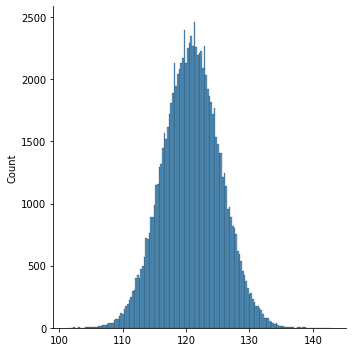

In [7]:
sns.displot(serie_means);

### c) Teorema del límite central

Existe un teorema matemático llamado Teorema del Limíte Central que establece que las distribuciones muestrales de estadísticas van a tender hacia la normalidad. Ésta no es una regla absoluta, pero se cumple en muchos casos. En nuestro ejemplo podemos calcular qué tan cerca de la normalidad están nuestros promedios muestrales: 

In [8]:
serie_means.skew()

0.013174899125865003

In [9]:
serie_means.kurtosis()

-0.005401906058296824

Como puedes ver, en este caso se cumple con mucha precisión. Entre más pequeñas sean nuestras remuestras, normalmente la curtosis aumenta.

Vamos a preguntarnos:

1. ¿Por qué creen que la curtosis aumente si nuestras remuestras son más pequeñas?
2. ¿Por qué la teoría del límite central suele cumplirse?
3. ¿Qué significa que la distribución muestral de una medida estadística **no** sea normal? ¿Cómo podemos interpretar ese fenómeno?